In [1]:
# Requirements
#   pip install matplotlib
#   pip install python-mnist
#   pip install scikit-learn

from mnist import MNIST
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot
import numpy

In [2]:
def evaluate_classifier(classifier, t_data, t_labels):
    prediction = classifier.predict(t_data)
    c_matrix = confusion_matrix(t_labels, prediction)
    return c_matrix

In [3]:
def generate_score(c_matrix):
    return (c_matrix.diagonal().sum() * 100.) / c_matrix.sum()

In [4]:
# define and load data from path
mnData = MNIST(r'D:\Dev\MachineLearning\MNIST_data')
data, labels = mnData.load_training()

In [5]:
# split data to train
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.3, random_state=46)

In [6]:
# Decision Tree
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(train_data, train_labels)
cm = evaluate_classifier(dt_classifier, test_data, test_labels)
print(cm)
score = generate_score(cm)
print("Score: "+str(score))

[[1608    2   24   28    8   35   27    7   22   14]
 [   0 1883   21   13    5   10    5    9   27    6]
 [  29   23 1560   51   22   19   28   36   42   20]
 [  13    8   56 1523   19   72   16   25   48   33]
 [  11    9   20   12 1518   13   23   28   18   69]
 [  19   15   20   70   23 1326   38   17   39   43]
 [  15    8   26    7   29   55 1622    1   40   16]
 [   8   14   39   18   20    9    0 1686   11   44]
 [  31   26   49   72   38   58   32    9 1371   53]
 [  12   14   15   45   80   36    3   59   42 1559]]
86.97777777777777


In [7]:
# Random Forest
rf_classifier = RandomForestClassifier(n_estimators=150, min_samples_split=2)
rf_classifier.fit(train_data, train_labels)
cm2 = evaluate_classifier(rf_classifier, test_data, test_labels)
print(cm2)
score2 = generate_score(cm2)
print("Score: "+str(score2))

[[1753    0    2    0    0    2    9    1    8    0]
 [   0 1957    6    4    3    0    1    3    4    1]
 [  10    7 1769    8    6    1    8    8    9    4]
 [   2    1   29 1739    0   13    3   11    9    6]
 [   4    3    5    0 1663    0   14    2    1   29]
 [   5    3    2   16    3 1546   12    1   13    9]
 [  14    5    1    0    2    7 1786    0    4    0]
 [   1    7   18    0    6    0    0 1792    0   25]
 [   6    8    4   12   11   12   10    3 1648   25]
 [   5    3    1   27   22    4    1   10   12 1780]]
96.85


In [10]:
#
test_data, test_labels = mnData.load_testing()
predicted = rf_classifier.predict(test_data)
cm3 = evaluate_classifier(rf_classifier, test_data, numpy.array(test_labels))
print(cm3)
score3 = generate_score(cm3)
print("Score: "+str(score3))

[[ 970    0    2    0    0    2    2    1    3    0]
 [   0 1125    2    2    1    1    2    1    1    0]
 [   6    0  996    7    3    0    4    8    8    0]
 [   1    0   11  972    0    9    0    9    6    2]
 [   1    0    0    0  953    0    5    1    3   19]
 [   3    1    0    8    3  863    7    1    4    2]
 [   7    3    0    0    5    5  933    0    5    0]
 [   1    2   23    1    0    0    0  987    3   11]
 [   4    0    6    9    6    6    3    4  923   13]
 [   6    6    3   13   14    2    1    3    4  957]]
Score: 96.79


In [20]:
# see digit
numberPosition = 5
digit = test_data[numberPosition]

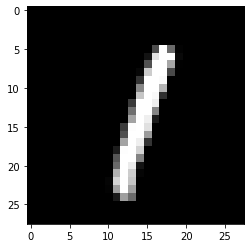

Numero: [1]


In [21]:
digit_float = numpy.array(digit, dtype="float")
pixels = digit_float.reshape((28, 28))
pyplot.imshow(pixels, cmap='gray')
pyplot.show()

numberPredict = rf_classifier.predict([test_data[numberPosition]])
print("Numero: "+str(numberPredict))